# Project: Analyze TMDb Movie Dataset
**The data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue, starting from the year 1960.** 
<br>This project aims to answer to the questions: "How has the movie industry changed over years?" and "What factors impact a film's revenue?".</br>

## Table of Contents
 1. Introduction
 2. Data Wrangling
 3. Exploratory Data Analysis
    - Question 1: The Output of Movies Over the Years
    - Question 2: The Average Runtime of Movies Over the Years
    - Question 3: The Movie Genres Over the Years
    - Question 4: Actors with the Most Appearances in Movies
    - Question 5: Directors with the Most Movies
    - Question 6: Profit Over Years
    - Question 7: Top Movies Based on Features
    - Question 8: Correlations
 4. Conclusions

## 1. INTRODUCTION
- This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue, starting from the year 1966.
- This project aims to answer to the questions: "How has the movie industry changed over years?" and "What factors impact a film's revenue?".
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. DATA WRANGLING

In [2]:
# Read CSV files and print the first 5 lines 
df = pd.read_csv('tmdb-movies.csv') # 10866 rows and 21 columns

#### Print the data's dimensions
The dataset consists of 10866 rows and 21 columns

In [3]:
print(df.shape)

(10866, 21)


#### View data columns
Find out the name of the columns of the dataset

In [4]:
print(list(df.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


#### View the top 5 rows of the dataset
There are top 5 rows are printed from the dataset. There are id columns as a unique value corresponding to each row entry which also represents each movie. There are columns which describes financial values (budget column, revevue column), cast (cast column), genre(genres columns),...  

In [5]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [6]:
# View the last 3 rows
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


#### Check the datatypes of the columns in the dataset
As the below result, there are three data types and many null values in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# check for nulls in the columns
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Descriptive Statistics
In this section, basic descriptive statistics are being presented for each column from the dataset.
> Numerous movies have entries with a budget, revenue, and runtime set to 0, indicating that either they never made it to theaters or there were errors during the data collection process

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
# View the movies have entries with a budget, revenue, and runtime set to 0
print(f"Total Rows Having 0 Values In Budget:{df[df['budget']==0].shape[0]}")
print(f"Total Rows Having 0 Values In Revenue:{df[df['revenue']==0].shape[0]}")
print(f"Total Rows Having 0 Values In Runtime:{df[df['runtime']==0].shape[0]}")

Total Rows Having 0 Values In Budget:5696
Total Rows Having 0 Values In Revenue:6016
Total Rows Having 0 Values In Runtime:31


### DATA CLEANING

>**1st Action**: Drop duplicate

In [11]:
# Remove the movies that appear more than once
# Check duplicates
df[df.duplicated()==True]
# Drop the duplicates and putting them in place
df.drop_duplicates(inplace=True)
# Checking to see if the duplicates are gone
df[df.duplicated()==True]

print(f"After dropping the duplicate there is a total of {df.shape[0]} rows.")

After dropping the duplicate there is a total of 10865 rows.


>**2nd Action**:Change release date to datetime

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head(3)

0   2015-06-09
1   2015-05-13
2   2015-03-18
Name: release_date, dtype: datetime64[ns]

>**3rd Action**:Remove unneeded columns

In [13]:
df.drop(['id', 'imdb_id','overview','imdb_id','homepage','tagline','keywords', 'overview'],axis =1,inplace = True)
print(f"After dropping the unneeded columns, there is a total of {df.shape[1]} columns.")

After dropping the unneeded columns, there is a total of 15 columns.


>**4th Action**: Drop rows with incorrect values
><br>There are numerous records in which the budget, revenue and runtime are recorded as 0. It is possible that these records were not properly tracked, leading to inaccurate data. Therefore, I remove them from the dataset.</br>

In [14]:
# Drop the rows with 0 In Budget and Revenue
df.drop(df[df['budget']==0].index, inplace=True)
df.drop(df[df['revenue']==0].index, inplace=True)
df.drop(df[df['runtime']==0].index, inplace=True)
# Remove nan values from genres column, keeping only movies, that has genres
df.dropna(subset=['genres'], inplace=True)
# Assign the 'Null' value to cast value with nan
df['cast'].fillna('Null', inplace=True)
df['director'].fillna('Null', inplace=True)
# Check remaining rows
print(f"Total Remaining Rows:{df.shape[0]}")

Total Remaining Rows:3854


>**5th Action**: Create two new columns
><br>Create new columns of profit and month</br>

In [29]:
# create two new columns named 'profit' and 'month' of released
df['profit'] = df['revenue_adj'] - df['budget_adj']
df['month'] = pd.to_datetime(df['release_date']).dt.month

#### Recheck the Descriptive Statistics to make sure that there are no 0 values in budget, revenue, runtime

In [30]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,month
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03,3854.000000
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08,9.282470e+07,7.042294
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08,1.940715e+08,3.362829
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08,1.000000
25%,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07,-1.504995e+06,4.000000
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07,2.737064e+07,7.000000
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08,1.074548e+08,10.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09,12.000000


## 3. EXPLORATORY DATA ANALYSIS

### Question 1: How has the output of movies changed over the years?
**Observation**:
> The number of number of movies has risen over time. From the beginning of 1960 to 2015, the line graph shows an exponential increase of movies released per year, starting from about 5 movies and hovering between 160-180 in the latest years.

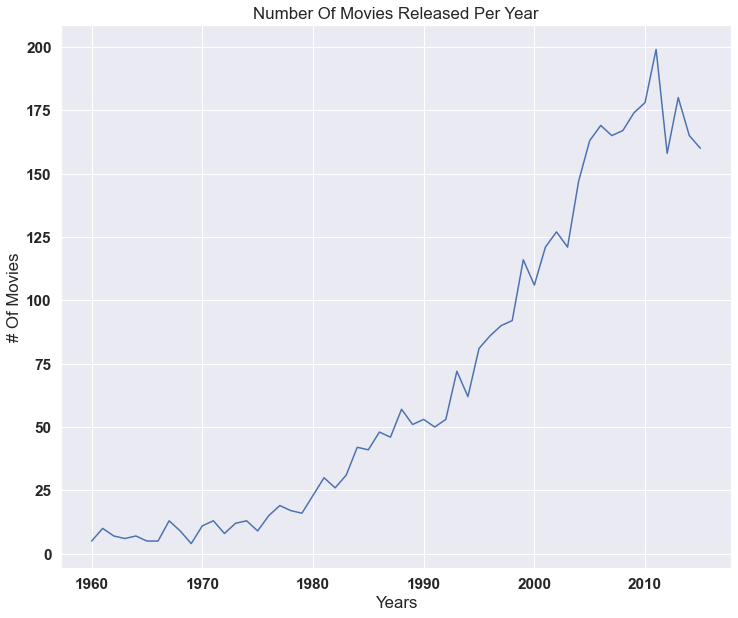

In [31]:
output_change = df.groupby('release_year').count()['original_title']
plt.plot(output_change)
plt.title("Number Of Movies Released Per Year")
plt.xlabel("Years")
plt.ylabel("# Of Movies");

In [32]:
output_change.head(3), output_change.tail(3)

(release_year
 1960     5
 1961    10
 1962     7
 Name: original_title, dtype: int64,
 release_year
 2013    180
 2014    165
 2015    160
 Name: original_title, dtype: int64)

### Question 2: The average runtime of movies over the years
It would be beneficial to find out how the average runtime of movies has changed over the years.

#### Question 2.1. How has the average runtime of the movies changed over the years?
**Observation**
> Between 1960 and 2015, there is a trend of decreasing average runtime with occasional spikes. The average runtime has declined from approximately 111 minutes to 96 over this period.

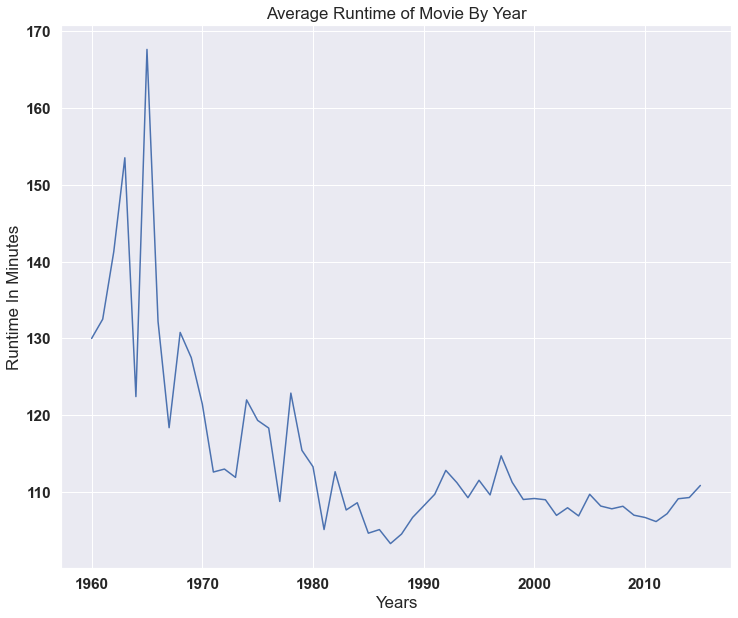

In [33]:
# Viewing the runtime_average using a line plot
year_run_time_mean = df.groupby('release_year')['runtime'].mean()
plt.plot(year_run_time_mean)
plt.title("Average Runtime of Movie By Year")
plt.xlabel("Years")
plt.ylabel("Runtime In Minutes");

In [34]:
year_run_time_mean.head(1), year_run_time_mean.tail(1)

(release_year
 1960    130.0
 Name: runtime, dtype: float64,
 release_year
 2015    110.86875
 Name: runtime, dtype: float64)

#### Question 2.2. Over the years, how has the output for films of different lengths (short, average, and long) changed?
> **Step 1**: Firstly, establish a mask based on the 'runtime' variable (short, average, and long). According to the source (https://towardsdatascience.com/are-new-movies-longer-than-they-were-10hh20-50-year-ago-a35356b2ca5b#:~:text=Vast%20majority%20of%20movies%20is,average%20movie%20runtime%20by%20year), it is determined that short films are less than 80 minutes, long film are more than 120 minutes and everything else is considered average.

> **Step 2**: Create the histogram to study the output for films of different lengths

**Observation**
> As observed in the histogram, there has been exponential growth in the production of average-length films and long films while the production of short films remained relatively stable. Over time, average-length movies have consistently surpassed the combined output of long and short films.

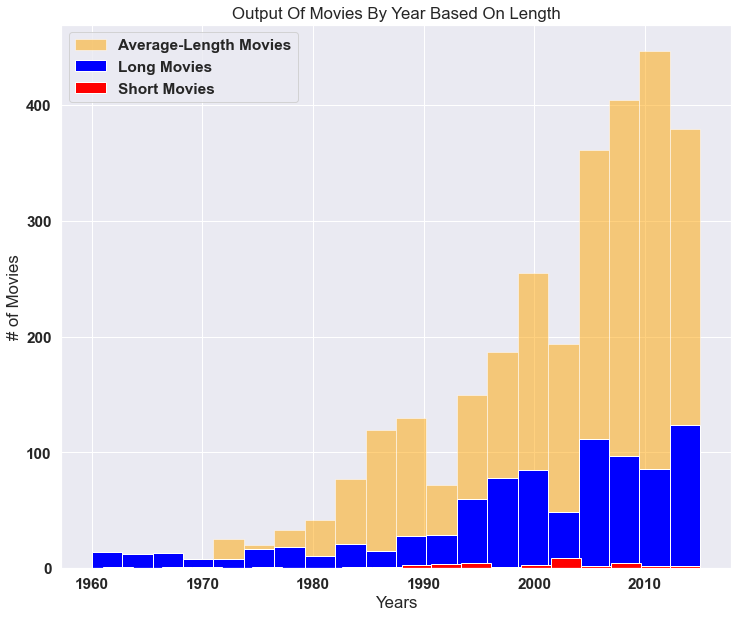

In [35]:
# Create a mask with 'runtime'
short_movies = df['runtime'] < 80
average_movies = (df['runtime'] >= 80) & (df['runtime']<=120)
long_movies = df['runtime']> 120

# Check how the output level of each movie length (short, average, long) by year
df['release_year'][average_movies].hist(alpha=0.5, bins = 20, label = "Average-Length Movies", color = "orange")
df['release_year'][long_movies].hist(bins = 20,label = "Long Movies",color = "blue")
df['release_year'][short_movies].hist(bins = 20,label = "Short Movies", color = "red")
plt.title("Output Of Movies By Year Based On Length")
plt.xlabel("Years")
plt.ylabel("# of Movies")
plt.legend();

### Question 3: How many movies were produced based on their genres?
**Observation**
> As we can see, Drama movies are the most frequent genre among others. According to this dataset, the top three dominant movie genres over the years (1960 - 2015) are Drama, Comedy, and Thriller.

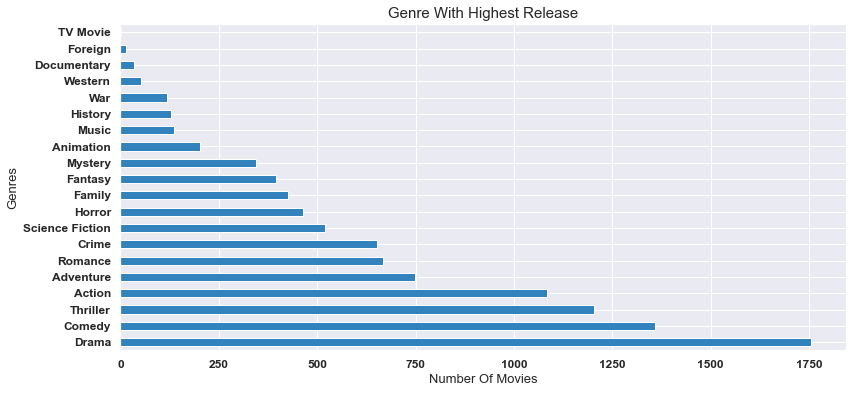

In [36]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

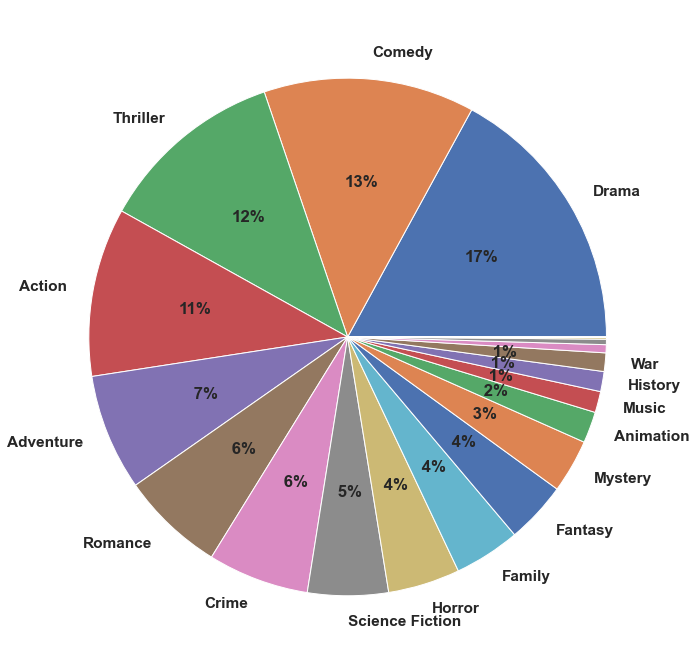

In [37]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(10, 10))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

### Question 4: Who are the actors that have appeared the most in movies?
**Observation**:
> The top 5 actors who have appeared the most in movies are Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage and Matt Damon

C:\Users\Phuong Tran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


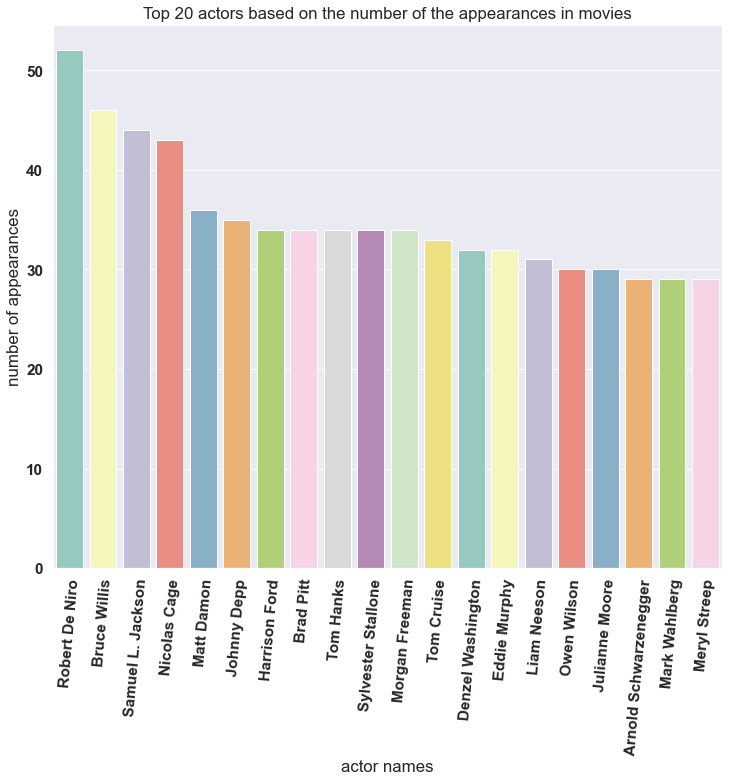

In [38]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

######
#Creating a dict for the cast, and how many times each actor casted for movies
######
actor_dict = {}

actors = df["cast"]
actors = actors.str.split("|")
actors = np.array(actors)
for actorList in actors:
    #check if there is a problematic list which is just a float
    for actor in actorList:
        actor = actor.lstrip() #trim the whitespaces
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1
            
sorted_actor_dict = sorted(actor_dict.items(), key = operator.itemgetter(1), reverse = True)
#sorted_actor_dict[0:10]


x_axis = list()
y_axis = list()

for item in sorted_actor_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])


sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis, y_axis, palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='actor names', ylabel='number of appearances', title = 'Top 20 actors based on the number of the appearances in movies')
plt.show()

### Question 5: Which directors have directed the highest number of movies?
**Observation**:
> Top 5 directors that have directed the highest number of movies are Steven Spielberg, Clint Eastwood, Ridley Scott, Woody Allen, Robert Rodriguez.

C:\Users\Phuong Tran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


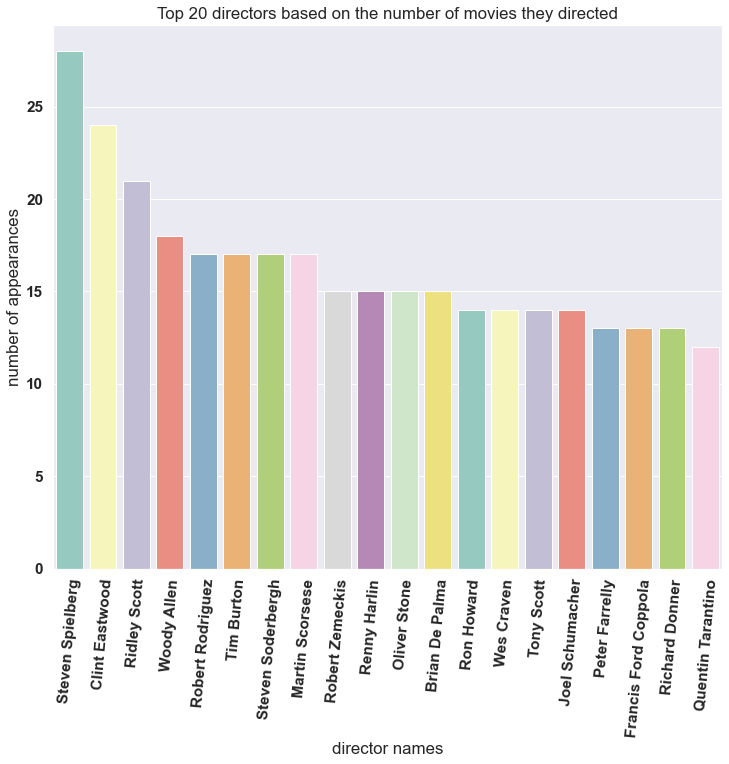

In [39]:
######
#Creating a dict for the directors, and how many times each director directs the movie
######
director_dict = {}

directors = df["director"]
directors = directors.str.split("|")
directors = np.array(directors)
for directorList in directors:
    #check if there is a problematic list which is just a float
    for director in directorList:
        director = director.lstrip() #trim the whitespaces
        if director not in director_dict:
            director_dict[director] = 1
        else:
            director_dict[director] += 1
                


sorted_director_dict = sorted(director_dict.items(), key = operator.itemgetter(1), reverse = True)
#sorted_actor_dict[0:10]


x_axis = list()
y_axis = list()

for item in sorted_director_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])


sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis, y_axis, palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='director names', ylabel='number of appearances', title = 'Top 20 directors based on the number of movies they directed')
plt.show()

### Question 6: Profit over years
Evaluating the profitability of movies over the years is essential, considering both total profit and average profit

#### Question 6.1. How has the total profit of the movies changed over the years?
**Observation**:
> Overall, the line graph depicts an sharply increasing trend in total profits over the decades, from 797 million dollars in 1960 to 17,500 million dollars in 2015.

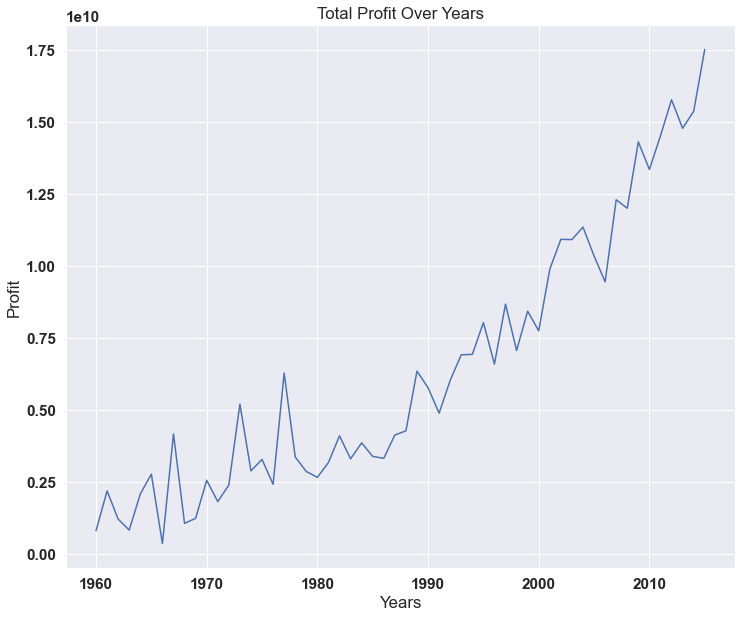

In [40]:
# Viewing the runtime_average using a line plot
year_run_time_sum = df.groupby('release_year')['profit'].sum()
plt.plot(year_run_time_sum)
plt.title("Total Profit Over Years")
plt.xlabel("Years")
plt.ylabel("Profit");

In [41]:
year_run_time_sum.tail(1), year_run_time_sum.head(1)

(release_year
 2015    1.750957e+10
 Name: profit, dtype: float64,
 release_year
 1960    7.977407e+08
 Name: profit, dtype: float64)

#### Question 6.2. How has the average profit of the movies changed over the years?
**Observation**:
> In contrast, there is a declining trend in average profits over the decades. The year 2006 recorded the lowest profit, approximately 56 million dollars, while the peak of average profit was observed in 1965, around 553 million dollars.

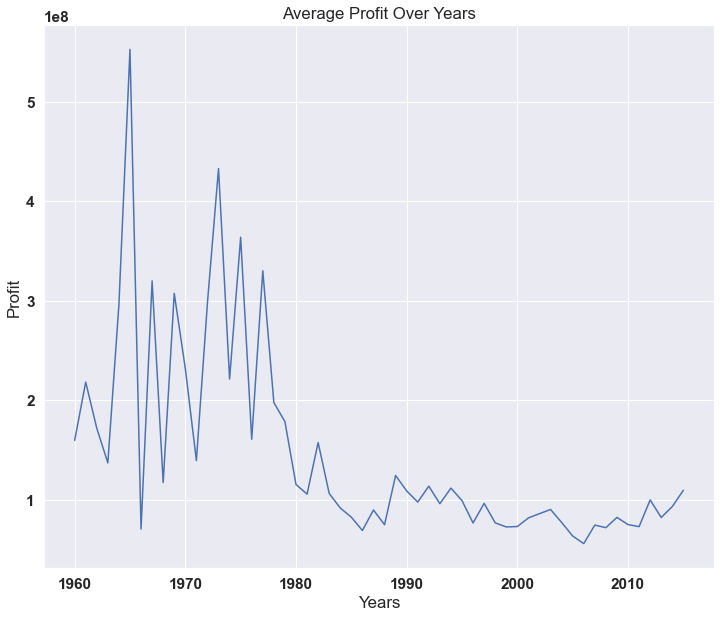

In [42]:
# Viewing the runtime_average using a line plot
year_run_time_mean = df.groupby('release_year')['profit'].mean()
plt.plot(year_run_time_mean)
plt.title("Average Profit Over Years")
plt.xlabel("Years")
plt.ylabel("Profit");

In [43]:
year_run_time_mean.sort_values()

release_year
2006    5.585189e+07
2005    6.342801e+07
1986    6.902224e+07
1966    7.049708e+07
2008    7.182521e+07
1999    7.259837e+07
2011    7.290796e+07
2000    7.300025e+07
2007    7.448429e+07
1988    7.482564e+07
2010    7.495069e+07
1996    7.656904e+07
1998    7.668696e+07
2004    7.713978e+07
2001    8.164507e+07
2013    8.207319e+07
2009    8.218418e+07
1985    8.241661e+07
2002    8.595209e+07
1987    8.963552e+07
2003    9.014710e+07
1984    9.163009e+07
2014    9.309273e+07
1993    9.593160e+07
1997    9.630338e+07
1991    9.760651e+07
1995    9.907411e+07
2012    9.976430e+07
1981    1.055405e+08
1983    1.062928e+08
1990    1.087903e+08
2015    1.094348e+08
1994    1.116238e+08
1992    1.135624e+08
1980    1.152827e+08
1968    1.172100e+08
1989    1.242996e+08
1963    1.369589e+08
1971    1.393045e+08
1982    1.574585e+08
1960    1.595481e+08
1976    1.607848e+08
1962    1.718493e+08
1979    1.784574e+08
1978    1.976323e+08
1961    2.181770e+08
1974    2.213122e+08


### Question 7: Top movies based on features
It would be beneficial to find out which movies had the highest profit, revenue, budget, popularity and the number of votes.

#### Question 7.1. What are the top 5 movies based on their profit?
**Observation**:
> According to the table below, the top 5 movies from the given dataset based on their profit are the following: Star Wars, Avatar, Titanic, The Exorcist and Jaws.

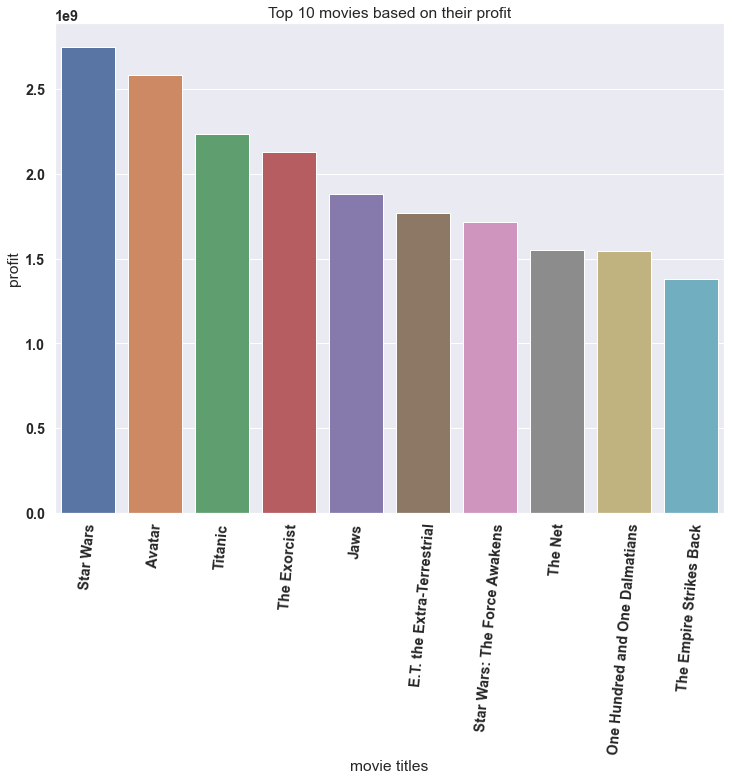

In [51]:
###
#Top Movies based on different features
###

revenue_dict = {}

#fetching different columns with 2 different ways of code
movies_and_profit = df[["original_title", "profit"]]
movies_and_revenue = df[["original_title", "revenue_adj"]]
movies_and_budget = df[['original_title','budget_adj']]
movies_and_popularity = df[['original_title','popularity']]
movies_and_votes= df[['original_title','vote_count']]


#print(movies_and_revenue.sort_values(by="revenue_adj", ascending=False).head(10))
#print("\n")
#print(movies_and_budget.sort_values(by = "budget_adj", ascending = False).head(10))

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)


ax = sns.barplot(
    x = movies_and_profit.sort_values(by = "profit", ascending=False).head(10).original_title, 
    y = movies_and_profit.sort_values(by = "profit", ascending=False).head(10).profit)



#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='movie titles', ylabel='profit', title = 'Top 10 movies based on their profit')
plt.show()

#### Question 7.2: What are the top 5 movies based on their revenue?
**Observation**:
> According to the table below, the top 5 movies from the given dataset based on their revenue are the following: Avatar, Star Wars, Titanic, The Exorcist and Jaws.

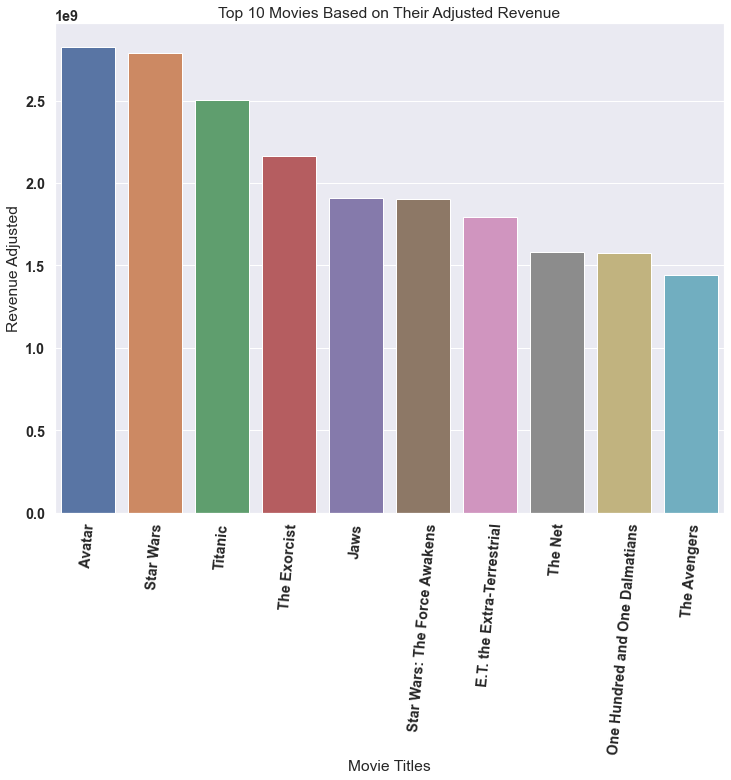

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12, 9)}, font_scale=1.3)

# Sorting the DataFrame before plotting
sorted_movies_and_revenue = movies_and_revenue.sort_values(by="revenue_adj", ascending=False).head(10)

ax = sns.barplot(
    x=sorted_movies_and_revenue.original_title, 
    y=sorted_movies_and_revenue.revenue_adj
)

# Rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='Movie Titles', ylabel='Revenue Adjusted', title='Top 10 Movies Based on Their Adjusted Revenue')
plt.show()

#### Question 7.3: What are the top 5 movies based on their adjusted budget?
**Observation**:
> According to the table below, the top 5 movies from the given dataset based on their adjusted budget are the following: The Warrior's Way, Pirates of the Caribbean: On Strange Tides, Pirates of the Caribbean: At World's Ends, Superman Returns, Titanic.

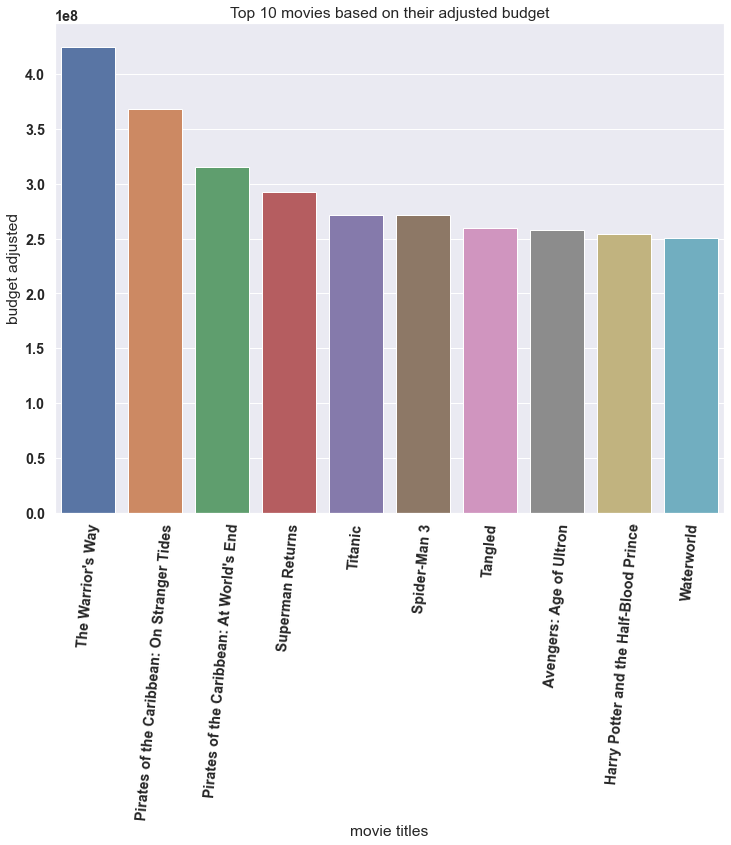

In [52]:
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)


ax = sns.barplot(
    x = movies_and_budget.sort_values(by = "budget_adj", ascending=False).head(10).original_title, 
    y = movies_and_budget.sort_values(by = "budget_adj", ascending=False).head(10).budget_adj)



#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='movie titles', ylabel='budget adjusted', title = 'Top 10 movies based on their adjusted budget')
plt.show()

#### Question 7.4: What are the top 5 movies based on their popularity?
**Observation**:
> According to the table below, the top 5 movies from the given dataset based on their popularity are the following: Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy, Insurgent.

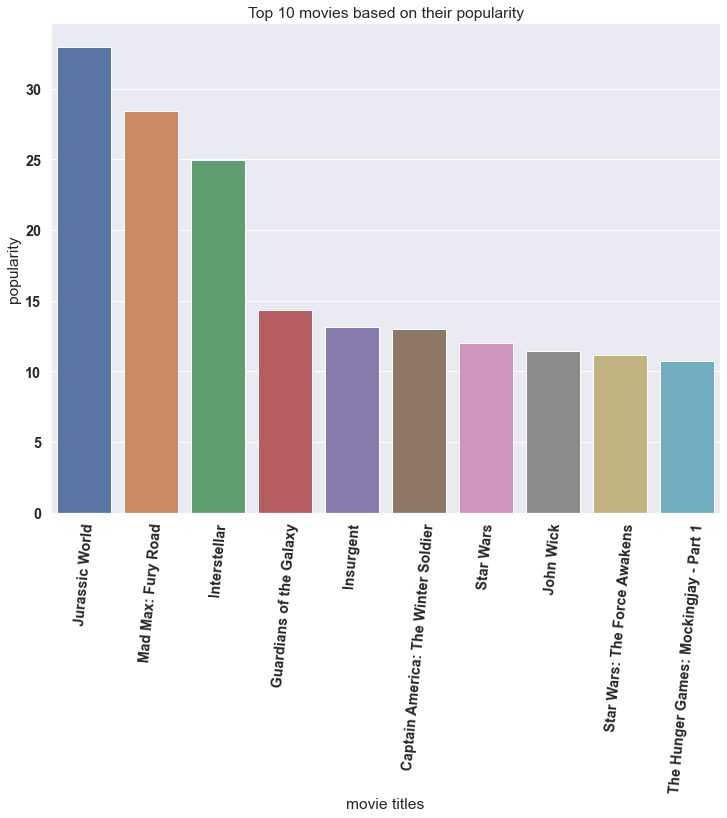

In [53]:
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)


ax = sns.barplot(
    x = movies_and_popularity.sort_values(by = "popularity", ascending=False).head(10).original_title, 
    y = movies_and_popularity.sort_values(by = "popularity", ascending=False).head(10).popularity)



#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='movie titles', ylabel='popularity', title = 'Top 10 movies based on their popularity')
plt.show()

#### Question 7.5: What are the top 5 movies based on their number of votes?
**Observation**:
> According to the table below, the top 5 movies from the given dataset based on their votes are the following: Inception, The Avengers, Avatar, The Dark Knight, Django Unchained.

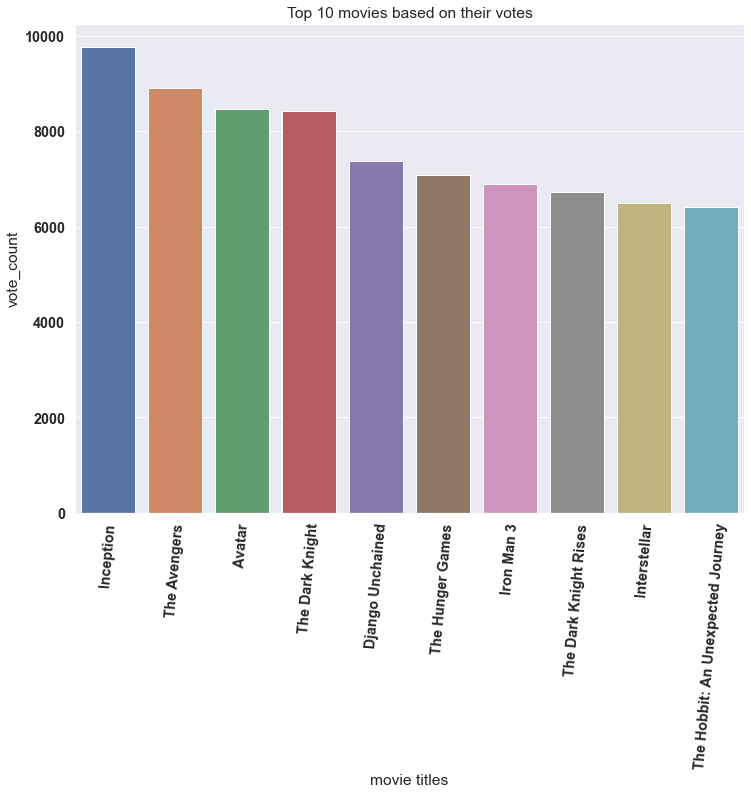

In [54]:
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)


ax = sns.barplot(
    x = movies_and_votes.sort_values(by = "vote_count", ascending=False).head(10).original_title, 
    y = movies_and_votes.sort_values(by = "vote_count", ascending=False).head(10).vote_count)



#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='movie titles', ylabel='vote_count', title = 'Top 10 movies based on their votes')
plt.show()

### Question 8: What factors impact a movie's profit?
This section focuses on exploring correlations. The motivation behind its creation stems from Question #7, where I examined the top 5 movies based on various characteristics such as profit, adjusted revenue, adjusted budget, popularity, and the number of votes. Initially, we anticipated that the top 5 movies would remain consistent regardless of the chosen features. However, this expectation was not met. To delve deeper into the investigation, the correlations were generated among the pairs of these five variables along with other potential variables.
#### Observation
> According to the below heatmap, there is a strong correlation between the profit and adjasted revenue; a positive correlation between the profit, vote_count, popularity and adjasted budget. Moroever, there is a weak positive correlation between the profit, runtime and month of release.

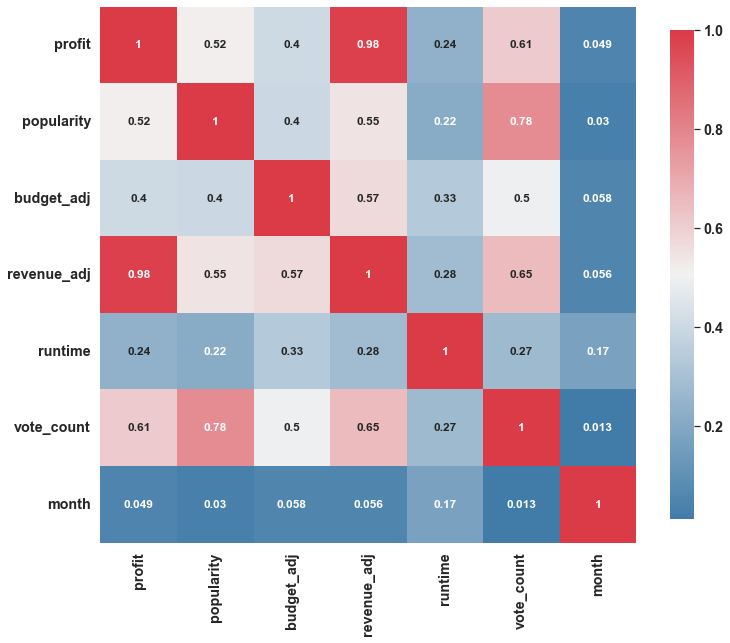

In [49]:
# evaluate the correlations between profit and 'popularity,budget_adj,revenue_adj,runtime,vote_count,vote_average,month of released'
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
plot_correlation_map(df[['profit','popularity','budget_adj','revenue_adj','runtime','vote_count','month']])

## 4. CONCLUSION
**Summary**
- The number of number of movies has risen over time, starting from about 5 movies and hovering between 160-180 in the latest years.
- There is a trend of decreasing average runtime with occasional spikes. The average runtime has declined from approximately 111 minutes to 96 over this period. There has been exponential growth in the production of average-length films and long films while the production of short films remained relatively stable. Over time, average-length movies have consistently surpassed the combined output of long and short films.
- The top three dominant movie genres are Drama, Comedy, and Thriller.
- The top 5 actors who have appeared the most in movies are Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage and Matt Damon.
- Top 5 directors that have directed the highest number of movies are Steven Spielberg, Clint Eastwood, Ridley Scott, Woody Allen, Robert Rodriguez.
- There is an sharply increasing trend in total profits of movies over years but a declining trend in average profits of movies over years.
- The top 5 movies based on their profit are the following: Star Wars, Avatar, Titanic, The Exorcist and Jaws.
- There is a strong correlation between the profit and adjasted revenue; a positive correlation between the profit, vote_count, popularity and adjasted budget. Moroever, there is a weak positive correlation between the profit, runtime and month of release.

**Limitations**:
-  The dataset contains many null and zero values in some features such as budget_adj, revenue_adj, cast, director, and genres. Therefore, these missing values can impact the analysis result, especially the factors influencing a movie's profit.
